Отдел маркетинга крупного интернет-магазина подготовил список гипотез по увеличению выручки.

**Задача:**
1. Приоритизировать 9 гипотез, с целью выяснить какую из гипотез целесообразнее проветить в первую очередь.
2. Построить графики кумулятивной выручки, среднего чека и среднего количества заказов на посетителя по группам, а также графики их относительного изменения, с целью анализа динамики этих метрик за время проведения теста.
3. Посчитать статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» и по «очищенным» данным с целью выяснить есть ли смысл вводить предлогаемые изменения.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

# Часть 1. Приоритизация гипотез.

In [30]:
hypothesis = pd.read_csv('C:\\Users\\78585\\Desktop\\Анализ данных\\Проекты\\Датафреймы\\hypothesis.csv')
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Hypothesis - краткое описание гипотезы,  
Reach - охват пользователей по  10 бальной шкале,  
Impact - влияние на пользователей по  бальной шкале,  
Confedence - уверенность в гипотезе по 10 бальной шкале,  
Efforts - затраты ресурсов на проверу гипотезы по 10 бальной шкале. Чем больше значение , тем дороже проверка гипотезы.

In [31]:
hypothesis.columns = hypothesis.columns.str.lower()

In [38]:
# Расчет фреймворка ICE для приоритизации гипотез.
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы под номерами 8,0,7,6 и 2.

In [39]:
# Расчет фреймворка RICE для приоритизации гипотез.
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По показателю RICE наиболее перспективные гипотезы под номерами 7,2,0,6 и 8. При этом гипотеза под номером 8 скатилась на пятое место. Это связано с тем, что у этой гипотезы низкое значение показателя 'reach', т.к. изменение затронит лишь небольшое число пользователей. 

Таким образом будет целесообразно первой протестировать гипотезу под номером 7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

# Часть 2. Анализ A/B-теста

In [7]:
orders = pd.read_csv('C:\\Users\\78585\\Desktop\\Анализ данных\\Проекты\\Датафреймы\\orders.csv')
visitors = pd.read_csv('C:\\Users\\78585\\Desktop\\Анализ данных\\Проекты\\Датафреймы\\visitors.csv')

In [9]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


transactionID - идентификатор заказа,  
visitorID - идентификатор пользователя, совершившего заказ,  
date - дата совершения заказа,  
revenue - выручка заказа,  
group - группа А/В теста, в которую попал заказ

In [10]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


date - дата,  
group - группа А/В теста,  
visitors - количество пользователей в указанную дату в указанной группе А/В теста

## 2.1 Предобработка данных.

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков в даных нет, но необходимо привести столбцы с датами к типу данных datetime. А также переименовать несколько столбцов.

In [15]:
# Переименование столбцов
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

In [16]:
#Изменение типа данных столбцов 'date'.
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [17]:
#Проверка данных на наличие дубликатов.
orders.duplicated().sum(),\
visitors.duplicated().sum()

(0, 0)

Полных дубликатов в данных нет.

## 2.2 Анализ А/В теста.

Проверим не попадают ли какие-то пользователи в обе группы - по таблице с заказами.

In [34]:
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

В обе группы попали 58 пользователей.
Так как их немного, оставим их в тесте и сообщим о наличии ошибки проектировщикам теста, чтобы в будущем ее исправили.

### 2.2.1 График кумулятивной выручки по группам. 

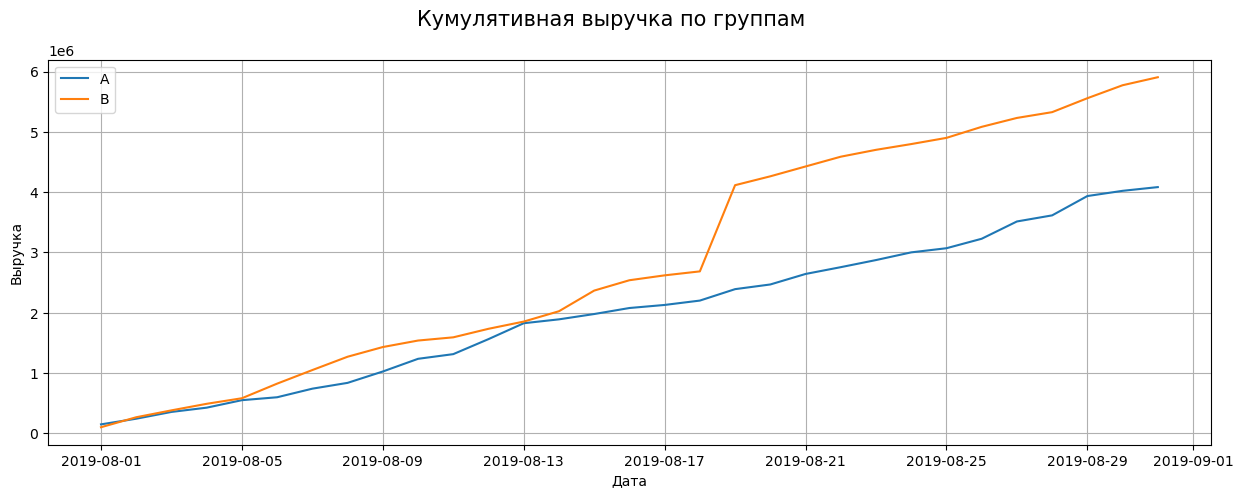

In [27]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {'date': 'max',
         'group': 'max',
         'transaction_id': 'nunique',
         'visitor_id': 'nunique',
         'revenue': 'sum',}),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.suptitle('Кумулятивная выручка по группам', fontsize=15)
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Однако группа В уже на пятый день теста начинает лидировать и сохраняет это лидерство до конца теста. Скачок графика может быть связан с резким увеличением количества заказов или с появлением в выборке очень дорогого заказа. 

### 2.2.2 График кумулятивного среднего чека по группам.

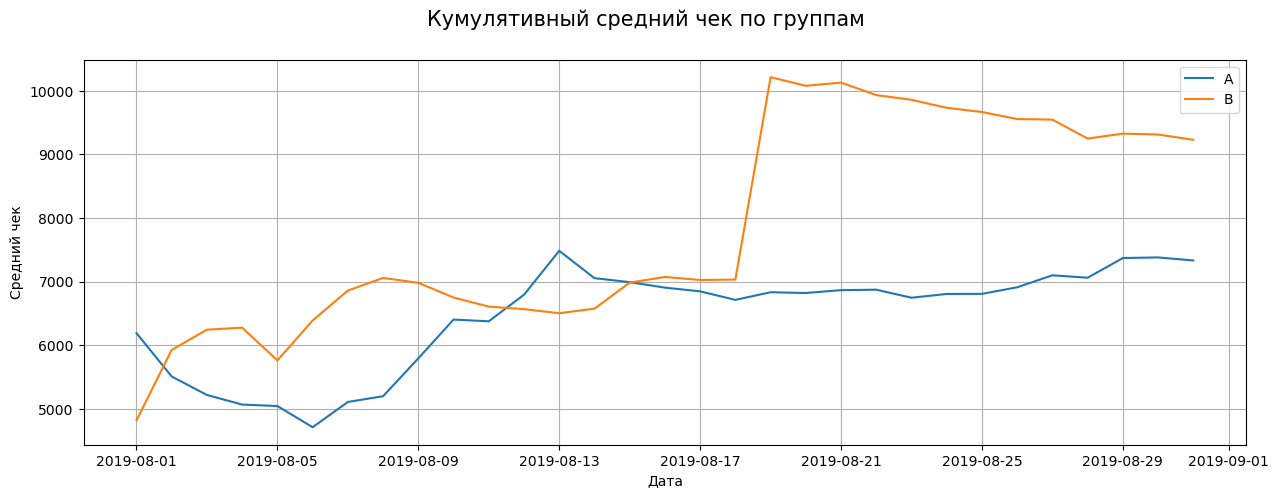

In [28]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.suptitle('Кумулятивный средний чек по группам', fontsize=15)
plt.show()

Первые две недели средний чек колеблется по обеим групам. Затем в группе А стабилизируется в районе 7000 рублей. Скачок в группе В опять говорит о том, что в выборке есть аномально большой заказ. 

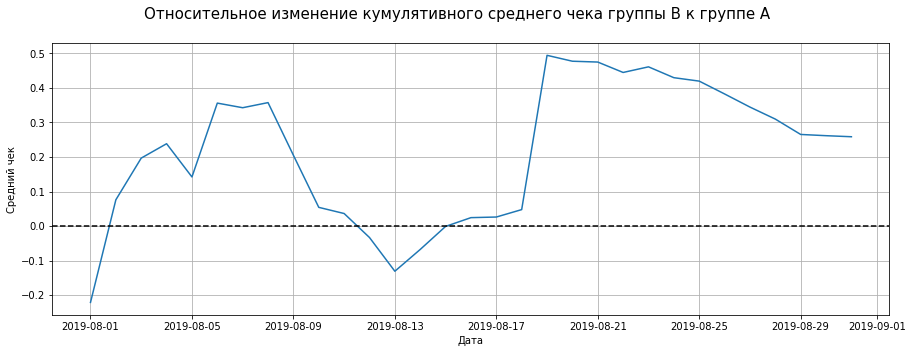

In [16]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, \
                                                   left_on='date', \
                                                   right_on='date', \
                                                   how='left', \
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(15,5))  
plt.plot(mergedCumulativeRevenue['date'], \
        (mergedCumulativeRevenue['revenueB']\
         /mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']\
         /mergedCumulativeRevenue['ordersA'])-1)


plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.suptitle('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=15)
plt.show()

График резко скачет в несколько дат. Видимо тогда и были совершены крупные заказы.

### 2.2.3 График кумулятивного среднего количества заказов на посетителя по группам.

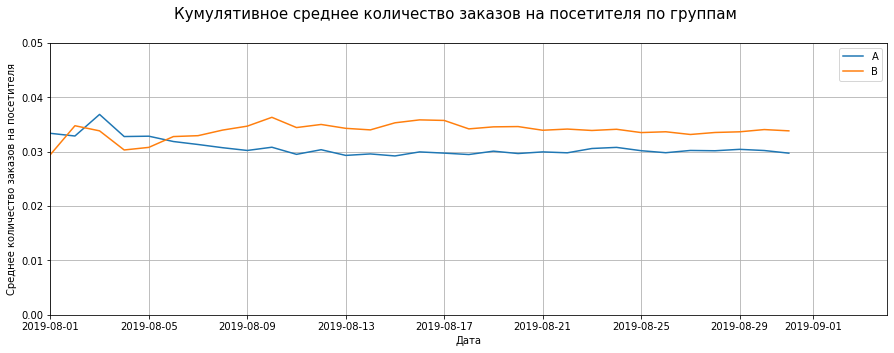

In [17]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis(["2019-08-01", '2019-09-04',  0, 0.05])  
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.grid()
plt.suptitle('Кумулятивное среднее количество заказов на посетителя по группам', fontsize=15)
plt.show()

Значения среднего количества заказов на посетителя в начале теста колебались в обеих группах, но уже к шестому дню группа В вырвалась вперёд и зафиксировалась, а группы А просела и также зафиксировалась ниже группы В.

### 2.2.4 График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

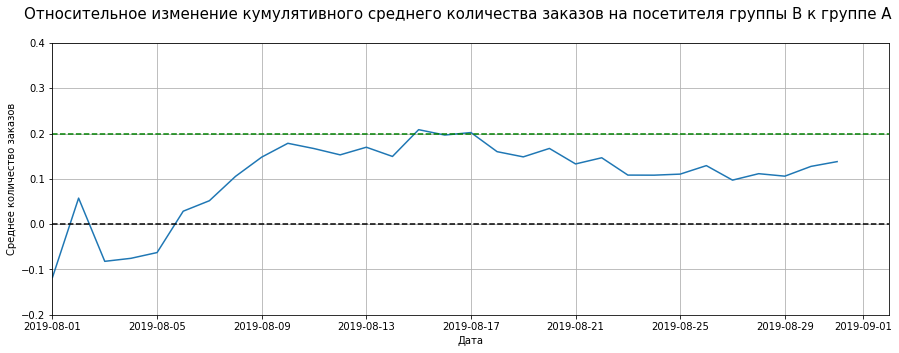

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='green', linestyle='--')
plt.axis(["2019-08-01", '2019-09-02', -0.2, 0.4])
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.grid()
plt.suptitle('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=15)
plt.show()

В начале теста группа B по большей части проигрывала группе A, затем вырвалась вперёд.

### 2.2.5 Построим точечный график количества заказов по пользователям.

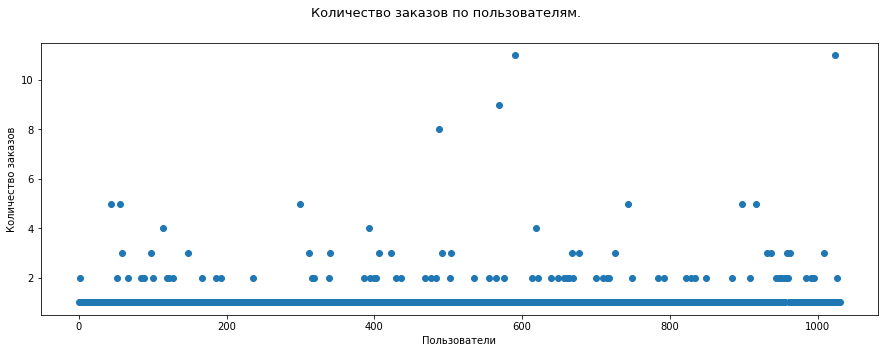

In [19]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders']) 
plt.suptitle('Количество заказов по пользователям.', fontsize=13)
plt.show()

Основная масса пользователей слелала только один заказ. Но в выборке есть и те, кто совершил более 10 заказов.

### 2.2.6 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.

In [20]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Большинство покупателей заказывали только один раз. Не более 10% пользователей совершали больше 1 заказа. И не более 1% пользователей - больше 4 заказов. Примите за аномальных пользователей тех, кто совершил 3 заказа и более.

### 2.2.7 Построим точечный график стоимостей заказов.

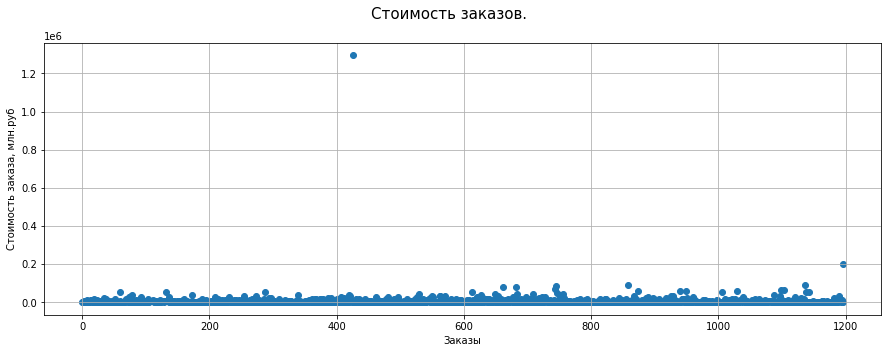

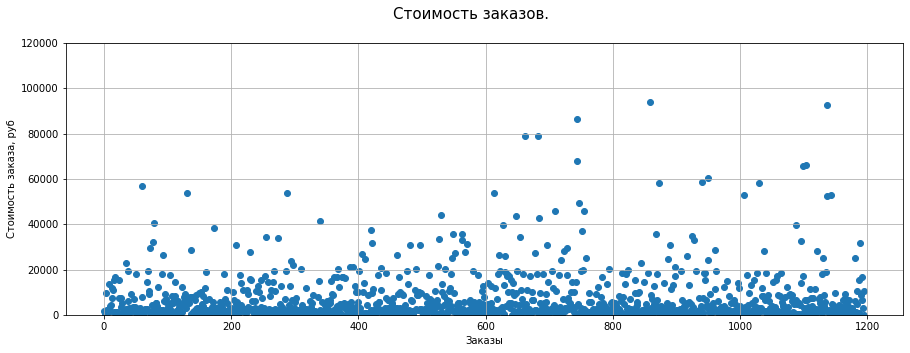

In [21]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue']) 
plt.suptitle('Стоимость заказов.', fontsize=15)
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа, млн.руб')
plt.grid(),
# Построим ещё один график с измененным масштабом по оси y.
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue']) 
plt.suptitle('Стоимость заказов.', fontsize=15)
plt.ylim(0, 120000)
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа, руб')
plt.grid()

На графике виден один аномальный заказ, стоимостью почти 1,3 млн.рублей. Так же из общей массы выделяется заказ примерно за 200000. Стоимость остальных заказов не превышает 100тыс.рублей.

### 2.2.8 Подсчёт 95-го и 99-го перцентилей стоимости заказов.

In [22]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. Примим за аномальных пользователей тех, кто совершил заказ на сумму свыше 28 000 рублей. 

### 2.2.9 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Для расчета статистической значимости различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» и по «очищенным» данным будем использовать критерий Манна-Уитни (Подходит для независимых выборок, в которых есть большие (по сравнению с нормальным распределением) выбросы).

Критический уровень статистической значимости зададим:
alpha = 0.05 

**Нулевая гипотеза:** Статистически значимых различий в среднем количестве заказов между группами А и В по «сырым» данным нет. 

**Альтернативная гипотеза:** Статистически значимые различия в среднем количестве заказов между группами по «сырым» данным есть.

In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("p-value: {}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост среднего числа заказов: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.016792355056752608
Относительный прирост среднего числа заказов: 0.138


Так как p-value меньше 0.05 (0.017 < 0.05), то  нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост среднего числа заказов группы B составляет 13,8%.

### 2.2.10 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 

**Нулевая гипотеза:** Статистически значимых различий в среднем чеке заказа между группами А и В по «сырым» данным нет. 

**Альтернативная гипотеза:** Статистически значимые различия в среднем чеке между группами по «сырым» данным есть.

In [24]:
print("p-value: {}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))     

p-value: 0.7292909855432458
Относительное различие в среднем чеке: 0.259


p-value больше 0.05 (0.729 > 0.05) значит нулевую гипотезу о равенстве среднего чека групп А и В отвергать нельзя, несмотря на то, что относительное различие в среднем чеке между группами составляет 25,9%.

### 2.2.11 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

**Нулевая гипотеза:** Статистически значимых различий в среднем количестве заказов между группами А и В по «очищенным» данным нет. 

**Альтернативная гипотеза:** Статистически значимые различия в среднем количестве заказов между группами по «очищенным» данным есть.

In [25]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [26]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print("p-value: {}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.013042592743036745
Относительный прирост среднего числа заказов: 0.173


Так как p-value меньше 0.05 (0.013 < 0.05), то нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет, отвергаем. Относительный прирост среднего числа заказов группы B по очищенным данным увеличился на 3,5% и составляет 17,3%.

### 2.2.12 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

**Нулевая гипотеза:** Статистически значимых различий в среднем чеке заказа между группами А и В по «очищенным» данным нет. 

**Альтернативная гипотеза:** Статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным есть.

In [27]:
print(
    "p-value: {}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительное различие в среднем чеке: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.738481751314565
Относительное различие в среднем чеке: -0.020


p-value больше 0.05 (0.738 > 0.05) значит нулевую гипотезу о равенстве среднего чека по «очищенным» данным групп А и В отвергать нельзя. Относительное различие в среднем чеке группы В ниже среднего чека группы А на 2%.

**ИТОГИ:**
Тест показал, что:
1. статистически значимого различия по среднему чеку между группами ни по «сырым», ни по «очищенным» данным нет.
2. есть статистически значимое отличие по среднему количеству заказов между группами и по «сырым»,ни по данным после фильтрации аномалий.

На основании полученных результатов можно принять решение об остановки теста и зафиксировать победу группы В. Несмотря на то, что разницы по среднему чеку нет, Группа В лидирует по количеству заказов на пользователя, что в конечном итоге приведёт к росту выручки.
